# Solving Systems of Nonlinear Equations with Newton's Method
CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Motivation

In this class, we will learn about a family of algorithms that quickly and reliably converges to a numeric value for $x$ that satisfies $c(x) = 0$ from an initial guess $x_0$.

a.k.a. Newton-type methods produce good approximations for roots of real-valued functions using an iterative process.

## Newton's Method (aka Newton-Raphson Method) with an Example

### Review Canonical Form

In a previous notebook, we discussed **canonical form**, $c(x) = 0$, for a system of linear equations. Here, $c(x)$ is a mathematical function that depends on variable $x$. $c(\cdot)$ can be linear or nonlinear. $x$ can be a scalar or vector.

We say $c(x) = 0$ is a **square system** if the number of variables equals the number of equations, i.e., there are zero degrees of freedom. In this notebook, we will focus on square systems. In a future notebook, we will talk about optimization problems which have extra degrees of freedom (more variables than equations).

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Answer the following short answer questions below to review canonical form.
</div>

**Multiple Choice** If $x$ is a three dimensional vector and $c(x) = 0$ is a square system, then...
1. $c(x)$ returns a scalar
2. $c(x)$ returns a two dimensional vector
3. $c(x)$ returns a three dimensional vector
4. None of the above.

Record your answer as an integer in the Python variable `ans_bi1`.

In [1]:
### BEGIN SOLUTION
ans_bi1 = 3
### END SOLUTION

In [2]:
### BEGIN HIDDEN TESTS
assert ans_bi1 == 3, "A square system has the same number of equations and variables."
### END HIDDEN TESTS

We say a function is **vector valued** if it returns a vector and **scalar valued** if it returns a scalar.

**Multiple Choice** Which is the following is canonical form for the equation $x^2 - 1/x = 2$?
1. $x^2 - 1/x - 2 = 0$
2. $\frac{x^3 - 2x - 1}{x} = 0$
3. $2 x^2 - 2/x - 4 = 0$
4. All of the above are canonical form

Store your answer as an integer in the Python variable `ans_bi2`.

In [3]:
### BEGIN SOLUTION
ans_bi2 = 4
### END SOLUTION

In [4]:
### BEGIN HIDDEN TESTS
assert ans_bi2 == 4, "There are many ways to write canonical form for a system of equations"
### END HIDDEN TESTS

### Main Idea Through an Example

An example is the easiest way to understand Newton methods. Let's find a root, i.e., values for $x$ that satisfy $c(x)=0$, for the following equation:

$$ c(x) = 3 x^3 + 2 x^2 - 5 x - 20 $$

**Chemical Engineering Application**: In Thermodynamics, you will learn about cubic equations of state. These are cubic polynomials in volume $V$ (or equivalently compressibility $Z$) that accurately predict many important quantities (enthalpy, entropy, fugacity) for a wide range of mixtures. In fact, you can predict the equilibrium coefficients $K$ in flash calculations with a cubic equation of state. But we won't "steal the thunder" of cubic equations of state right now. We'll just focus on the generic math problem above for simplicity.

We will start by plotting the function $c(x)$.

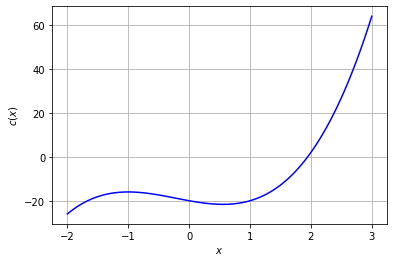

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#this next line is only needed in iPython notebooks
%matplotlib inline 

def nonlinear_function(x):
    ''' compute a nonlinear function for demonstration
    Arguments:
        x: scalar
    Returns:
        c(x): scalar
    '''
    return 3*x**3 + 2*x**2 - 5*x-20

Np = 100
X = np.linspace(-2,3,Np)
plt.plot(X,nonlinear_function(X),label="c(x)",color="blue")
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$c(x)$")
plt.show()

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Based on the plot above, answer the following short answer questions.
</div>

**Multiple Choice** How many real and imaginary roots are there for $c(x)$?
1. One real root and two imaginary roots
2. Three real roots
3. Two real roots and one imaginary root
4. One real root and no imaginary roots
5. No real or imaginary roots
6. None of the above

Record your answer as an integer in the Python variable `ans_bii1`.

In [6]:
### BEGIN SOLUTION
ans_bii1 = 1
### END SOLUTION

In [7]:
### BEGIN HIDDEN TESTS
assert ans_bii1 == 1, "How many total roots are there for all cubic equations? How many real roots are shown in the plot?"
### END HIDDEN TESTS

**Numeric Answer** What is the real root for c(x) = 0 based on the plot? Approximate your answer to 1 decimal point and record in the Python variable `ans_bii2`.

In [8]:
### BEGIN SOLUTION
ans_bii2 = 1.9
## END SOLUTION

In [9]:
### BEGIN HIDDEN TESTS
assert ans_bii2 >= 1.7, "Your answer is too small."
assert ans_bii2 <= 2.1, "Your answer is too large."
### END HIDDEN TESTS

### Algorithm Steps and Iteration 1

We will start Newton's method at the initial guess $x_0 = 1.25$.

For each iteration of the algorithm, we will do the following steps:
1. Construct a tangent line at the current guess
2. Solve the tangent line (a linear system!) to compute a new guess
3. Check if our guess is "close enough" to the true solution to stop

The Python code below does the first two steps described above. We'll talk about good stopping criteria, i.e., knowing when we are "close enough", soon.

Guess 0 = 1.25 (initial)
Guess 1 = 2.4778934700108186


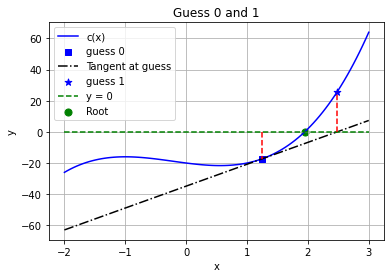

In [9]:
guess = 1.25
print("Guess 0 =",guess, "(initial)")

# plot function again
plt.plot(X,nonlinear_function(X),label="c(x)",color="blue")

# plot original guess
plt.scatter(guess,nonlinear_function(guess),label="guess 0",
            marker="s", s=30,color="blue")

### construct tangent line
# calculate slope with finite difference perturbation
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)

# plot tanget plane centered at guess
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),
         'k-.', label="Tangent at guess")

### calculate new guess and plot
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),label="guess 1",
            marker="*", s=50,color="blue")
print("Guess 1 =",new_guess)

### draw lines to guide eye
# horizontal line at y=0
plt.plot(X,0*X,"--",label="y = 0",color="green")

# vertical line from guess to y=0 line
plt.plot(np.array([guess,guess]),
         np.array([0,nonlinear_function(guess)]),'r--')

# vertical line from new_guess to y=0 line
plt.plot(np.array([new_guess,new_guess]),
         np.array([0,nonlinear_function(new_guess)]),'r--')

# root for c(x)=0
plt.scatter(1.94731,0,label="Root", s=50, color="green")

### finish formatting plot
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1")
plt.grid(True)
plt.show()

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Study the Python code above. Then fill in the $?$s in the formulas below. These are the calculations done in Python.
</div>

Approximate the slope of the tangent line:

$$s = \frac{c(x_0) - c(?)}{?}$$

Compute the next guess:

$$x_1 = ? - \frac{?}{?}$$

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write one question or observation to share during class about the code above.
</div>

Your question/observation:

### Convergence

*Are we there yet?* There are two popular stopping criteria for Newton's method:
1. Check the (norm of the) step size $\Delta x_i = x_i - x_{i-1}$. When our guess only changes by a very small amount, we should stop. We either arrived at the solution or should try something else.
2. Check the (norm of the) residual(s) $c(x_i)$.  When the (norm of the) residual(s) is almost zero, then $x_i$ is a good numeric approximation to the true (analytic) solution.

Here $x_i$ is the guess after iteration $i$. We called our initial guess $x_0$. Recall, $x$ can be a vector and $c(x)$ can be a vector valued function, hence the "(norm of the)" above.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Based on the graph above, answer the following short answer questions.
</div>

**Numeric Answer**: What is $c(x_1)$, i.e., $c(\cdot)$ evaluated at guess 1? Record your answer with two significant digits in the Python variable <tt>ans_biv1</tt>. 

*Hint*: You can read this off of the plot we made above.

In [10]:
### BEGIN SOLUTION
ans_biv1 = nonlinear_function(2.4778934700108186)
print("Answer =",ans_biv1)
### END SOLUTION

Answer = 25.532915745237332


In [11]:
### BEGIN HIDDEN TESTS
assert ans_biv1 >= 21.0, "Your answer is too low."
assert ans_biv1 <= 30.0, "Your answer is too high."
### END HIDDEN TESTS

**Numeric Answer**: What is $\Delta x_1 = x_1 - x_0$, i.e., $c(\cdot)$ evaluated at guess 1? Record your answer with three significant digits in the Python variable <tt>ans_biv2</tt>.

In [13]:
### BEGIN SOLUTION
ans_biv2 = 2.4778934700108186 - 1.25
print("delta x =",ans_biv2)
### END SOLUTION

delta x = 1.2278934700108186


In [14]:
### BEGIN HIDDEN TESTS
assert ans_biv2 > 1.20, "Your answer is too small."
assert ans_biv2 < 1.25, "Your answer is too large."
### END HIDDEN TESTS

### Iteration 2

Based on the large residual and large step size, we decide to continue with Newton's method. We proceed to i) fit the tangent line around $x_1$, and then use the tangent line to calculate $x_2$. Please take a few minutes to read through the Python code below.

Guess 1 = 2.4778934700108186
Guess 2 = 2.0535383605864483


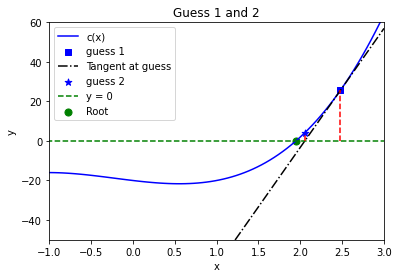

In [15]:
guess = new_guess
print("Guess 1 =",guess)

# plot function again
plt.plot(X,nonlinear_function(X),label="c(x)",color="blue")

# plot original guess
plt.scatter(guess,nonlinear_function(guess),label="guess 1",
            marker="s", s=30,color="blue")

### construct tangent line
# calculate slope with finite difference perturbation
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)

# plot tanget plane centered at guess
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),
         'k-.', label="Tangent at guess")

### calculate new guess and plot
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),
            label="guess 2",marker="*", s=50,color="blue")
print("Guess 2 =",new_guess)

### draw lines to guide eye
# horizontal line at y=0
plt.plot(X,0*X,"--",label="y = 0",color="green")

# vertical line from guess to y=0 line
plt.plot(np.array([guess,guess]),
         np.array([0,nonlinear_function(guess)]),'r--')

# vertical line from new_guess to y=0 line
plt.plot(np.array([new_guess,new_guess]),
         np.array([0,nonlinear_function(new_guess)]),'r--')

# root for c(x)=0
plt.scatter(1.94731,0,label="Root", s=50, color="green")

### finish formatting plot
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.axis([-1,3,-50,60])
plt.show()

## Newton's Method Generalized

### Generalization

As you can see, we get closer to the root each iteration.  This is due to the fact that close enough to a point, the tangent line is a reasonable approximation--just as the linear Taylor series can be a good approximation.  Of course, this is not always a good approximation as we will see later.

The basic idea is to compute where the tangent line crosses the $x$ axis. We do this by solving

$$f'(x_i) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i},$$ with $f(x_{i+1}) = 0$ to get

$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

It's that simple.

**Notice**: We switch from $c(x) = 0$ to $f(x) = 0$. People use them **interchangeably for canonical form**.

### Algorithm and Implementation

We can now implement a general purpose version of Newton's method in Python.


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Fill in the missing line in the general single-variable Newton's method function below.
</div>

Hints:
* Which formula (written above) should you use to update `x` each iteration?
* Read the document string.
* `f` and `fprime` are both functions. Review Chapter 01 Notebook 04 for more information on passing functions as an input argument to functions.

In [17]:
def newton(f,fprime,x0,epsilon=1.0e-6, LOUD=False, max_iter=50):
    """Find the root of the function f(x) via Newton-Raphson method
    Args:
        f: the function, in canoncial form, we want to fix the root of [Python function]
        fprime: the derivative of f [Python function]
        x0: initial guess [float]
        epsilon: tolerance [float]
        LOUD: toggle on/off print statements [boolean]
        max_iter: maximum number of iterations [int]
        
    Returns:
        estimate of root [float]
    """
    
    assert callable(f), "Warning: 'f' should be a Python function"
    assert callable(fprime), "Warning: 'fprime' should be a Python function"
    assert type(x0) is float or type(x0) is int, "Warning: 'x0' should be a float or integer"
    assert type(epsilon) is float, "Warning: 'eps' should be a float"
    assert type(max_iter) is int, "Warning: 'max_iter' should be an integer"
    assert max_iter >= 0, "Warning: 'max_iter' should be non-negative"
    
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    converged = False
    
    # Check if the residual is close enough to zero
    while (not converged and iterations < max_iter):
        
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",f(x),"/",
                  fprime(x),"=",x - f(x)/fprime(x))
        
        # add general single-variable Newton's Method equation below
        ### BEGIN SOLUTION
        x = x - f(x) / fprime(x)
        ### END SOLUTION
        
        # check if converged
        if np.fabs(f(x)) < epsilon:
            converged = True
        
        iterations += 1 
    print("It took",iterations,"iterations")
    
    if not converged:
        print("Warning: Not a solution. Maximum number of iterations exceeded.")
    return x #return estimate of root

### Unit Test and Example

We created a function. We should immediately test it. Recall our test problem:

$$ c(x) = 3 x^3 + 2 x^2 - 5 x - 20 $$

Our friends at Wolframalpha.com tell us the roots are $x \approx 1.9473$ and $x \approx -1.3070 \pm 1.3097 i$ where $i = \sqrt{-1}$. Because we know the solution, we can use this as a unit test. We will only focus on real roots in this class.

To apply Newton's method, we need the first derivative to create the tangent line:

$$c'(x) = 9 x^2 + 4 x - 5$$

In [18]:
def Dnonlinear_function(x):
    ''' compute 1st derivative of nonlinear function for demonstration
    Arguments:
        x: scalar
    Returns:
        c'(x): scalar
    '''
    return 9*x**2 + 4*x - 5

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: How could we use a lambda function instead of a <tt>def</tt> function for the derivative calculation? Give it a try below.
</div>

In [22]:
### BEGIN SOLUTION
Donlinear_function = lambda x : 9*x**2+4*x-5
print(Donlinear_function(1))
### END SOLUTION

8


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Run the code to verify your modifications to <tt>newton</tt> are correct.
</div>

In [23]:
root = newton(nonlinear_function,Dnonlinear_function,-1.5,LOUD=True,max_iter=15)
print("The root estimate is",root,"\nf(",root,") =",nonlinear_function(root))

x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
x_ 4 = -11.184552053047796 - -3911.2567600472344 / 1076.1096334338297 = -7.54992539557002
x_ 5 = -7.54992539557002 - -1159.3159776918205 / 477.81265972577813 = -5.123627234367753
x_ 6 = -5.123627234367753 - -345.3883141179978 / 210.7694953933235 = -3.484925611661592
x_ 7 = -3.484925611661592 - -105.25615528465704 / 90.36265622268793 = -2.320106429882939
x_ 8 = -2.320106429882939 - -35.100340028952424 / 34.165618894325654 = -1.2927478991471761
x_ 9 = -1.2927478991471761 - -16.675175982276617 / 4.869782580156233 = 2.131465750600949
x_ 10 = 2.131465750600949 - 7.479645608829035 / 44.41417921626759 = 1.963059044886359
x_ 11 = 1.963059044886359 - 0.5864442011938849 / 37.53464350293673 = 1.9474349667957278
x_ 12 = 1.9474349667957278 - 0.004789634744607

You should see the following output:
```
x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
x_ 4 = -11.184552053047796 - -3911.2567600472344 / 1076.1096334338297 = -7.54992539557002
x_ 5 = -7.54992539557002 - -1159.3159776918205 / 477.81265972577813 = -5.123627234367753
x_ 6 = -5.123627234367753 - -345.3883141179978 / 210.7694953933235 = -3.484925611661592
x_ 7 = -3.484925611661592 - -105.25615528465704 / 90.36265622268793 = -2.320106429882939
x_ 8 = -2.320106429882939 - -35.100340028952424 / 34.165618894325654 = -1.2927478991471761
x_ 9 = -1.2927478991471761 - -16.675175982276617 / 4.869782580156233 = 2.131465750600949
x_ 10 = 2.131465750600949 - 7.479645608829035 / 44.41417921626759 = 1.963059044886359
x_ 11 = 1.963059044886359 - 0.5864442011938849 / 37.53464350293673 = 1.9474349667957278
x_ 12 = 1.9474349667957278 - 0.004789634744607696 / 36.92226641627101 = 1.947305244673835
It took 12 iterations
The root estimate is 1.947305244673835 
f( 1.947305244673835 ) = 3.2858902798693634e-07
```

In [24]:
### BEGIN HIDDEN TESTS
def f_test(x):
    #compute a nonlinear function for demonstration
    return 3*x**3 + 2*x**2 - 5*x-20

def df_test(x):
    #compute a nonlinear function for demonstration
    return 9*x**2 + 4*x - 5

root_test = newton(f_test,df_test,-1.5,LOUD=False,max_iter=15)

assert np.abs(root_test - 1.947305244673835) < 1E-4, "Your function newton did not work for the test cubic."
### END HIDDEN TESTS

It took 12 iterations


Let's look at what happened.  We had a bad initial guess so the method went the wrong way at first, but it eventually honed in on the solution. This highlights a feature of open methods: the root estimate can get worse, and even diverge. This is in comparison with closed methods (such as bisection) where the root is confined to an interval. On the other hand, open methods only require an initial guess instead of knowledge of an interval where the root lies. 

Run the code below to see what happens when we exceed the number if iterations.

In [25]:
root = newton(nonlinear_function,Dnonlinear_function,-1.5,LOUD=True,max_iter=3)
print("The root estimate is",root,"\nf(",root,") =",nonlinear_function(root))

x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
It took 3 iterations
The root estimate is -11.184552053047796 
f( -11.184552053047796 ) = -3911.2567600472344


You should get:

```
x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
It took 3 iterations
Warning: Not a solution. Maximum number of iterations exceeded.
The root estimate is -11.184552053047796 
f( -11.184552053047796 ) = -3911.2567600472344
```


The next bit of code demonstrates graphically what happened in the Newton solve.

### Looking Deeper into the Unit Test

**Warning 1:** You must rerun the following three cells in order and only once. If you want to rerun a cell (say Iteration 3), you must start with Iteration 1 and rerun them in order.

**Warning 2:** Make sure your modification to `newton` is correct. Otherwise, the code below will not work correctly.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Run the code below.
</div>

#### Iteration 1

Initial Guess = -1.5


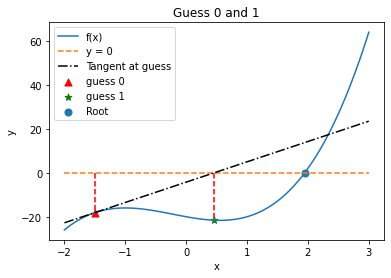

In [26]:
X = np.linspace(-2,3,Np)
plt.plot(X,nonlinear_function(X),label="f(x)")
guess = -1.5
print("Initial Guess =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess 0",c="red", marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*", label="guess 1",c="green", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1")
plt.show()

#### Iteration 2

Guess 1 = 0.4592158749161699
Guess 2 = -16.591800422397238


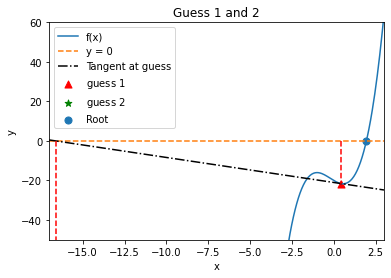

In [27]:
X = np.linspace(-17,3,400)
guess = new_guess
print("Guess 1 =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,nonlinear_function(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess $1$",c="red",marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*",label="guess $2$",c="green", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.axis([-17,3,-50,60])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.show()

#### Iteration 3

Guess 2 = -16.591800422397238
Guess 3 = -11.152177441789688


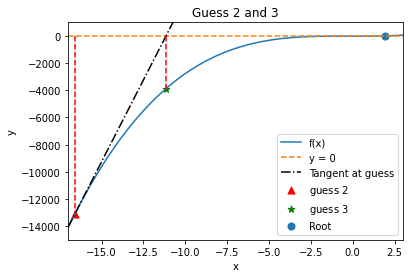

In [28]:
X = np.linspace(-17,3,400)
guess = new_guess
print("Guess 2 =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,nonlinear_function(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess $2$",c="red",marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
print("Guess 3 =",new_guess)
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*",label="guess $3$",c="green", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.axis([-17,3,-15000,1000])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 2 and 3")
plt.show()

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Fill in 2 or 3 observations here.
</div>

**Describe your observations here:**
1. Fill in...
2. Fill in...
3. Optional...

In hindsight, it's pretty amazing that it actually found the root.  This demonstrates that method has some robustness.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Share your observations with a partner. Then we'll regroup and discuss as a class.
</div>

The secant method is a variation on the theme of Newton's method. In this case we use the previous two guesses to construct the slope:

$$f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}.$$ 

The benefit of this is that it **does not require an additional function evaluation**. This will be a big savings if it takes a long time to do a function evaluation. One issue is that we need two points to get started.  Therefore, we can use **inexact Newton for the first step** and then **use secant from then on**.  Below is a graphical example.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, walk through the example below. Flip a figurative coin to decide who is "Partner A" and who is "Partner B".
</div>

### 9e-i. Iteration 1

Inexact Newton Step

Initial Guess = 1.3


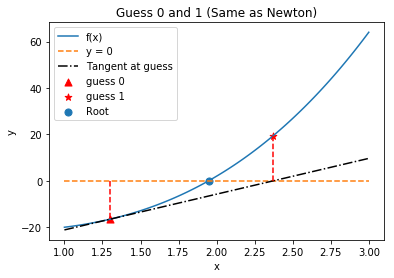

In [28]:
X = np.linspace(1,3,Np)
plt.plot(X,nonlinear_function(X),label="f(x)")
guess = 1.3
print("Initial Guess =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess 0",c="red", marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*",label="guess 1",c="red", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1 (Same as Newton)")
plt.savefig("Secant-Methods1.pdf")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Partner A: Describe in a few sentences the lines and points on the plot. What are the most important features?
</div>

### 9d-ii. Iteration 2

Secant Method

Guess 1 = 2.3727105503764285
Guess 2 = 1.7925464201668238


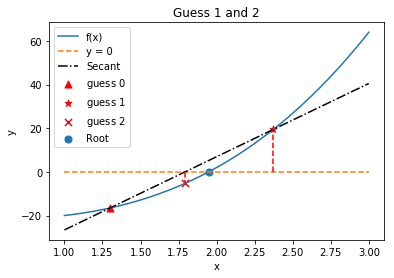

In [29]:
old_guess = guess
guess = new_guess
print("Guess 1 =",guess)
slope = (nonlinear_function(guess)-nonlinear_function(old_guess))/(guess - old_guess)
plt.plot(X,nonlinear_function(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(old_guess) + slope*(X-old_guess),'k-.', label="Secant")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(old_guess,nonlinear_function(old_guess),label="guess $0$",c="red", marker="^", s=50)
plt.scatter(guess,nonlinear_function(guess),marker="*",label="guess $1$",c="red", s=50)
new_guess = guess-nonlinear_function(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,nonlinear_function(new_guess),marker="x", label="guess $2$",c="red", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.savefig("Secant-Methods2.pdf")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Swith roles! Partner B: Describe in a few sentences the lines and points on the plot. What are the most important features?
</div>

### 9e-iii. Secant Method Algorithm

We can now generalize the secant method (similar to inexact Newton).

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Run the code below.
</div>

In [30]:
def secant(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    x = x0
    if (LOUD):
        print("x0 =",x0)
    
    #first time use inexact Newton
    x_old = x
    fold = f(x_old)
    fx = fold
    slope = (f(x_old+delta) - fold)/delta
    x = x - fold/slope
    if (LOUD):
        print("Inexact Newton\nx_",1,"=",x,"-",fx,"/",slope,"=",
              x - fx/slope,"\nStarting Secant")
    fx = f(x)
    iterations = 1 
    
    # now switch to secant method
    while (np.fabs(fx) > epsilon):
        # recall fx, x correspond with the last point,
        # fold, and x_old correspond to the 2nd to last point
        ### SWITCH ROLES. Discuss this line in depth.
        slope = (fx - fold)/(x - x_old)
        
        # switch the history. overwrite fold with fx, etc.
        fold = fx
        x_old = x
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        
        # calculate new point
        x = x - fx/slope
        
        # evaluate function f at new point
        fx = f(x)
        iterations += 1
    print("It took",iterations,"iterations")
    return x #return estimate of root

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: As a class, discuss the output below.
</div>

In [31]:
root = secant(nonlinear_function,-1.5,LOUD=True)

x0 = -1.5
Inexact Newton
x_ 1 = 0.45945970372823863 - -18.125 / 9.249998846883045 = 2.4189194074564773 
Starting Secant
x_ 2 = 0.45945970372823863 - -21.58411181208517 / -1.7653396012704734 = -11.767146325248616
x_ 3 = -11.767146325248616 - -4572.272414110397 / 372.19554564146875 = 0.517451025937337
x_ 4 = 0.517451025937337 - -21.636092826944633 / 370.4343081984803 = 0.5758583935814591
x_ 5 = 0.5758583935814591 - -21.64317999154791 / -0.1213402501968484 = -177.79183045192954
x_ 6 = -177.79183045192954 - -16795875.77015077 / 94164.21906726681 = 0.5760882386351796
x_ 7 = 0.5760882386351796 - -21.643113428270524 / 94164.09772754615 = 0.5763180832782079
x_ 8 = 0.5763180832782079 - -21.643046105986738 / 0.29290342772317585 = 74.46772411503576
x_ 9 = 74.46772411503576 - 1249567.865555407 / 16911.161604699413 = 0.5775978916445297
x_ 10 = 0.5775978916445297 - -21.642657354146493 / 16911.454507939132 = 0.5788776548573265
x_ 11 = 0.5788776548573265 - -21.64224503667768 / 0.32218262307570056 = 67

Secant is not quite as good as Newton (it took an additional iteration), but it does not need to know the derivative. Additionally, as mentioned above, there are fewer function evaluations (per iteration) than inexact Newton.

Newton's method, including it's inexact variant, and the secant method can both converge slowly in the presence of the following:
<ul>
<li>Multiple roots or closely spaced roots
<li>Complex roots
<li>Bad initial guess (we saw this one already in the example where the guesses went the wrong way at first)
</ul>

<div style="background-color: rgba(255,0,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Note</b>: There are no Home Activities in this section. We will walk through the examples quickly in class together.
</div>

### 9f-i. Example 1: Multiple Roots, overlapping

The function $$f(x) = x^7$$ has multiple roots at 0. Let's see how it converges with Newton.

Notice I switch from $c(x) = 0$ to $f(x) = 0$. People use them interchangeably for canonical form.

In [32]:
# define function
mult_root = lambda x: 1.0*x**7

# define first derivative
Dmult_root = lambda x: 7.0*x**6

# solve with Newton's method
root = newton(mult_root,Dmult_root,1.0,epsilon=1.0e-12,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 1.0 / 7.0 = 0.8571428571428572
x_ 2 = 0.8571428571428572 - 0.33991667708911394 / 2.7759861962277634 = 0.7346938775510204
x_ 3 = 0.7346938775510204 - 0.11554334736330486 / 1.1008713373781547 = 0.6297376093294461
x_ 4 = 0.6297376093294461 - 0.03927511069548781 / 0.43657194805493627 = 0.5397750937109538
x_ 5 = 0.5397750937109538 - 0.013350265119917321 / 0.1731311002086809 = 0.4626643660379604
x_ 6 = 0.4626643660379604 - 0.004537977757820996 / 0.0686585063310034 = 0.3965694566039661
x_ 7 = 0.3965694566039661 - 0.0015425343201428206 / 0.027227866546925984 = 0.3399166770891138
x_ 8 = 0.3399166770891138 - 0.0005243331403988625 / 0.01079774024099974 = 0.29135715179066896
x_ 9 = 0.29135715179066896 - 0.00017822957877208114 / 0.004282053979924045 = 0.2497347015348591
x_ 10 = 0.2497347015348591 - 6.058320617519827e-05 / 0.0016981318199673287 = 0.2140583156013078
x_ 11 = 0.2140583156013078 - 2.0593242130478076e-05 / 0.0006734272130863475 = 0.18347855622969242
x_ 12 = 0.183478

### 9f-ii. Example 2: Multiple roots, spaced far apart

Now consider

$$f(x) = \sin(x),$$

which has multiple roots that are spaced far apart. We'll see Newton's method converge fast in this case.

In [33]:
# define function
mult_root = lambda x: np.sin(x)

# define derivative
Dmult_root = lambda x: np.cos(x)

# call Newton's method
root = newton(mult_root,Dmult_root,1.0,LOUD=True, epsilon=1e-12)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 0.8414709848078965 / 0.5403023058681398 = -0.5574077246549021
x_ 2 = -0.5574077246549021 - -0.5289880970896319 / 0.8486292436261492 = 0.06593645192484066
x_ 3 = 0.06593645192484066 - 0.06588868458420974 / 0.9978269796130803 = -9.572191932508134e-05
x_ 4 = -9.572191932508134e-05 - -9.572191917890302e-05 / 0.9999999954186571 = 2.923566201412306e-13
It took 4 iterations
The root estimate is 2.923566201412306e-13 
f( 2.923566201412306e-13 ) = 2.923566201412306e-13


### 9f-iii. Example 3: Complex roots near the real root

For the case of complex roots let's consider a function that has complex roots near the actual root.  One such function is
$$ f(x) = x(x-1)(x-3) + 3.$$
The derivative of this function is 
$$ f'(x) =3x^3 - 8x  + 3.$$
The root is at $x= -0.546818$.

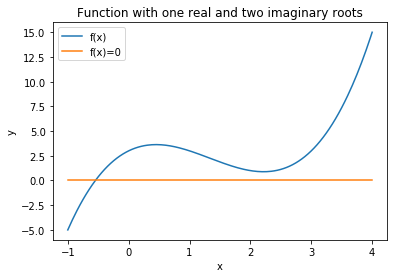

In [34]:
x = np.linspace(-1,4,200)
comp_root = lambda x: x*(x-1)*(x-3) + 3
d_comp_root = lambda x: 3*x**2 - 8*x + 3
plt.plot(x, comp_root(x),'-',label="f(x)")
plt.plot(x,0*x,label="f(x)=0")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function with one real and two imaginary roots")
plt.show()

In [35]:
root = newton(comp_root,d_comp_root,2.0,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 2.0
x_ 1 = 2.0 - 1.0 / -1.0 = 3.0
x_ 2 = 3.0 - 3.0 / 6.0 = 2.5
x_ 3 = 2.5 - 1.125 / 1.75 = 1.8571428571428572
x_ 4 = 1.8571428571428572 - 1.1807580174927113 / -1.5102040816326543 = 2.6389961389961383
x_ 5 = 2.6389961389961383 - 1.4385483817495095 / 2.780932752940469 = 2.1217062547914827
x_ 6 = 2.1217062547914827 - 0.9097213333636254 / -0.4687377434679618 = 4.062495845646789
x_ 7 = 4.062495845646789 - 16.218911005018263 / 20.01165072251795 = 3.2520224254422248
x_ 8 = 3.2520224254422248 - 4.845718347978311 / 8.71077016319959 = 2.69573196464577
x_ 9 = 2.69573196464577 - 1.6091181327603166 / 3.235056758472666 = 2.1983316861047486
x_ 10 = 2.1983316861047486 - 0.8881406969735082 / -0.08866688244154908 = 12.21493171215154
x_ 11 = 12.21493171215154 - 1265.3500398359906 / 352.89421650036365 = 8.629296185493123
x_ 12 = 8.629296185493123 - 373.6072839850617 / 157.35988848695354 = 6.255074345497114
x_ 13 = 6.255074345497114 - 109.99716055272572 / 70.33727043911153 = 4.691221215200477
x_ 14 = 

This converged slowly. This is because the complex roots at $x=2.2734\pm0.5638 i$ make the slope of the function change so that tangents don't necessarily point to a true root. 

We can see this graphically by looking at each iteration.

#### Iteration 1

Initial Guess = 2


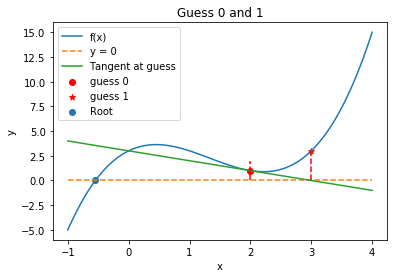

In [36]:
X = np.linspace(-1,4,Np)
plt.plot(X,comp_root(X),label="f(x)")
guess = 2
print("Initial Guess =",guess)
slope = d_comp_root(guess)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess 0",c="red")
new_guess = guess-comp_root(guess)/slope
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess 1",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1")
plt.show()

#### Iteration 2

Guess 1 = 3.0
Guess 2 = 2.5


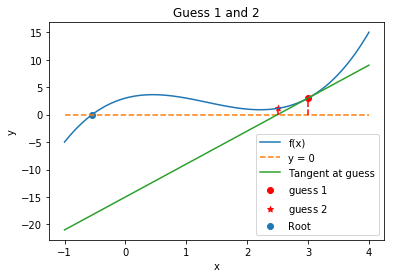

In [37]:
guess = new_guess
print("Guess 1 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $1$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $2$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.show()

#### Iteration 3

Guess 2 = 2.5
Guess 3 = 1.8571428571428572


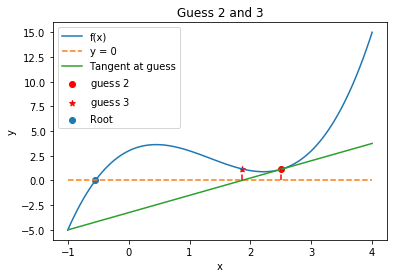

In [38]:
guess = new_guess
print("Guess 2 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $2$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 3 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $3$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 2 and 3")
plt.show()

Guess 3 = 1.8571428571428572
Guess 4 = 2.6389961389961383


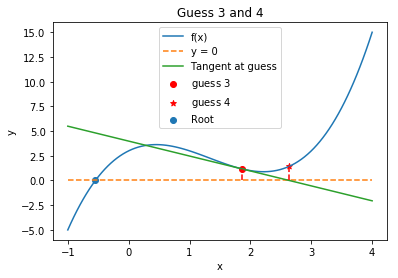

In [39]:
guess = new_guess
print("Guess 3 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $3$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 4 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $4$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 3 and 4")
plt.show()

Notice that the presence of the complex root causes the solution to oscillate around the local minimum of the function. Eventually, the method will converge on the root, but it takes many iterations to do so. The upside, however, is that it does eventually converge.